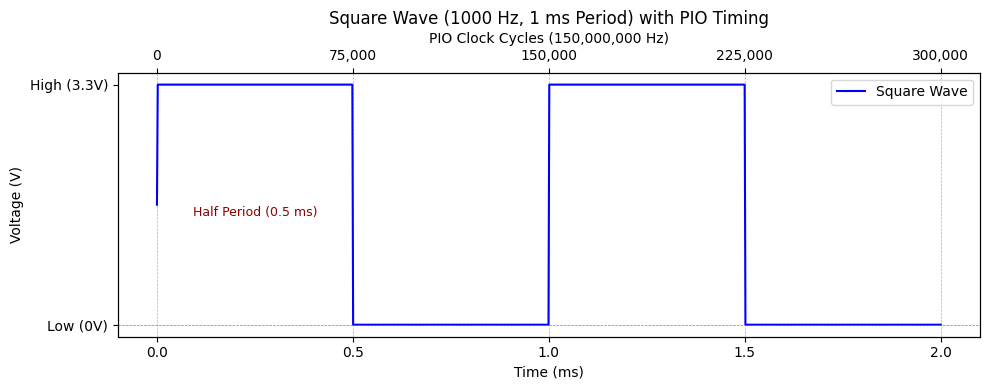

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
frequency = 1000  # Hz (1000 Hz tone)
period = 1 / frequency  # seconds (Period = 1 ms)
clock_speed = 150e6  # Hz (150 MHz clock)
half_period_cycles = int(clock_speed / (frequency * 2))  # Clock cycles for half period
time = np.linspace(0, 2 * period, 1000)  # 2 cycles of the wave
square_wave = 0.5 * (np.sign(np.sin(2 * np.pi * frequency * time)) + 1)  # Square wave

# Parameters for PIO clock operations
pio_clock_speed = 150e6  # PIO clock speed in Hz (150 MHz)
time_in_cycles = time * pio_clock_speed  # Convert time to PIO clock cycles

# Plot with additional x-axis for PIO operations
fig, ax1 = plt.subplots(figsize=(10, 4))

# Primary plot: Time in milliseconds
ax1.plot(time * 1e3, square_wave * 3.3, color='blue', label="Square Wave")  # Convert voltage to 3.3V
ax1.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Ground line
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Voltage (V)")
ax1.set_title("Square Wave (1000 Hz, 1 ms Period) with PIO Timing")
ax1.set_xticks(np.arange(0, 2.1, 0.5))  # Tick every 0.5 ms
ax1.set_yticks([0, 3.3], labels=["Low (0V)", "High (3.3V)"])
ax1.grid(axis='x', linestyle='--', linewidth=0.5)

# Add annotations
# ax1.text(period * 1e3 / 2, 3.8, "High (3.3V)", ha="center", fontsize=10)  # High annotation
# ax1.text(period * 1e3 / 2, -0.5, "T = 1 ms (Period)", ha="center", fontsize=10)  # Period annotation
ax1.text(period * 1e3 / 4, 1.5, "Half Period (0.5 ms)", ha="center", fontsize=9, color='darkred')

# Secondary x-axis: PIO operations in clock cycles
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())  # Match the primary x-axis limits
pio_ticks = np.arange(0, 2.1, 0.5) * pio_clock_speed * 1e-3  # Convert ms to PIO cycles
ax2.set_xticks(pio_ticks / pio_clock_speed * 1e3)  # Match ticks in ms
ax2.set_xticklabels([f"{int(tick):,}" for tick in pio_ticks.astype(int)])  # Format as integer cycles with commas
ax2.set_xlabel("PIO Clock Cycles (150,000,000 Hz)")

# Legend
ax1.legend(loc="upper right")
plt.tight_layout()
plt.show()


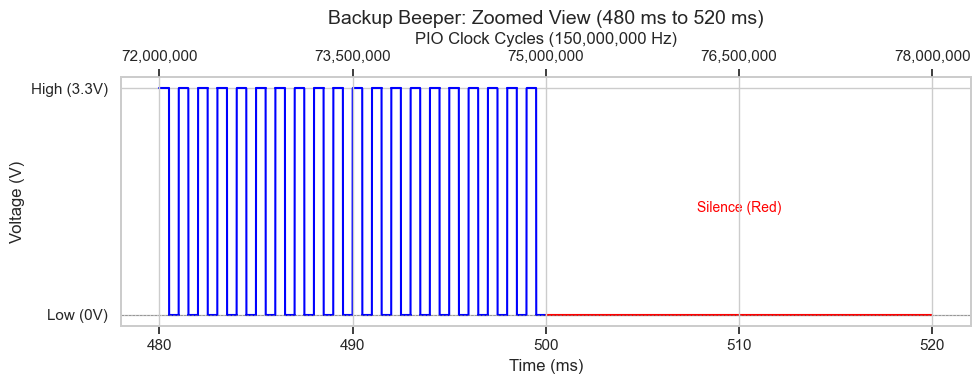

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")


# Parameters
frequency = 1000  # Hz (1000 Hz tone)
pio_clock_speed = 150e6  # Hz (150 MHz clock)
square_wave_time = np.linspace(0, 1, 150000)  # Full 1 second wave with high resolution
square_wave_signal = np.where(square_wave_time <= 0.5, 
                              0.5 * (np.sign(np.sin(2 * np.pi * frequency * square_wave_time)) + 1) * 3.3, 
                              0)  # Square wave for 0.5s, then silence

# Extract 480 ms to 520 ms range
zoomed_time = square_wave_time[(square_wave_time >= 0.48) & (square_wave_time <= 0.52)]
zoomed_wave = square_wave_signal[(square_wave_time >= 0.48) & (square_wave_time <= 0.52)]

# Recompute the wave signal colors: blue up to 500 ms, red after 500 ms
zoomed_wave_color = np.where(zoomed_time <= 0.5, 'blue', 'red')

# Plot with Seaborn aesthetics
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot each segment with its corresponding color and label
for i in range(len(zoomed_wave) - 1):
    ax1.plot(zoomed_time[i:i + 2] * 1e3, zoomed_wave[i:i + 2], 
             color=zoomed_wave_color[i])

# Add labels for "Square Wave" and "Silence"
# ax1.text(490, 2.5, "Square Wave (Blue)", fontsize=10, color='blue', ha="center")
ax1.text(510, 1.5, "Silence (Red)", fontsize=10, color='red', ha="center")

# Primary axis labels and title
ax1.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Ground line
ax1.set_xlabel("Time (ms)", fontsize=12)
ax1.set_ylabel("Voltage (V)", fontsize=12)
ax1.set_title("Backup Beeper: Zoomed View (480 ms to 520 ms)", fontsize=14)
ax1.set_xticks(np.linspace(480, 520, 5))  # Tick every 10 ms
ax1.set_yticks([0, 3.3], labels=["Low (0V)", "High (3.3V)"])
ax1.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

# Secondary x-axis: PIO operations in clock cycles
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())  # Match the primary x-axis limits
pio_ticks_zoomed = np.linspace(480, 520, 5) * pio_clock_speed * 1e-3  # Convert ms to PIO cycles
ax2.set_xticks(pio_ticks_zoomed / pio_clock_speed * 1e3)  # Match ticks in ms
ax2.set_xticklabels([f"{int(tick):,}" for tick in pio_ticks_zoomed.astype(int)])  # Format as integer cycles with commas
ax2.set_xlabel("PIO Clock Cycles (150,000,000 Hz)", fontsize=12)

# Add legend
# ax1.legend(loc="center", fontsize=10)
plt.tight_layout()
plt.show()
